In [ ]:
import cv2

# Load the image and annotation file
image_path = cv2.imread('/content/drive/MyDrive/VisDrone/images/0000008_03999_d_0000044.jpg')
annotation_path = '/content/drive/MyDrive/VisDrone/annotations/0000008_03999_d_0000044.txt'




In [ ]:
def detect_objects(image_path, annotation_path):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the object coordinates from the annotation file
    with open(annotation_path, 'r') as f:
        lines = f.readlines()
    objects = []
    for line in lines:
        coords = line.strip().split(',')
        x, y, w, h = map(int, coords[:4])
        objects.append((x, y, x+w, y+h))
    
    
    

In [ ]:
# Create a HOG descriptor and detect objects in the image
    # Load the pre-trained HOG detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
detected, _ = hog.detectMultiScale(gray, winStride=(4, 4), padding=(8, 8))
    

In [ ]:
    # Draw bounding boxes on the detected objects
    for (x, y, w, h) in detected:
        for (x0, y0, x1, y1) in objects:
            if x > x0 and y > y0 and x+w < x1 and y+h < y1:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
                break
    

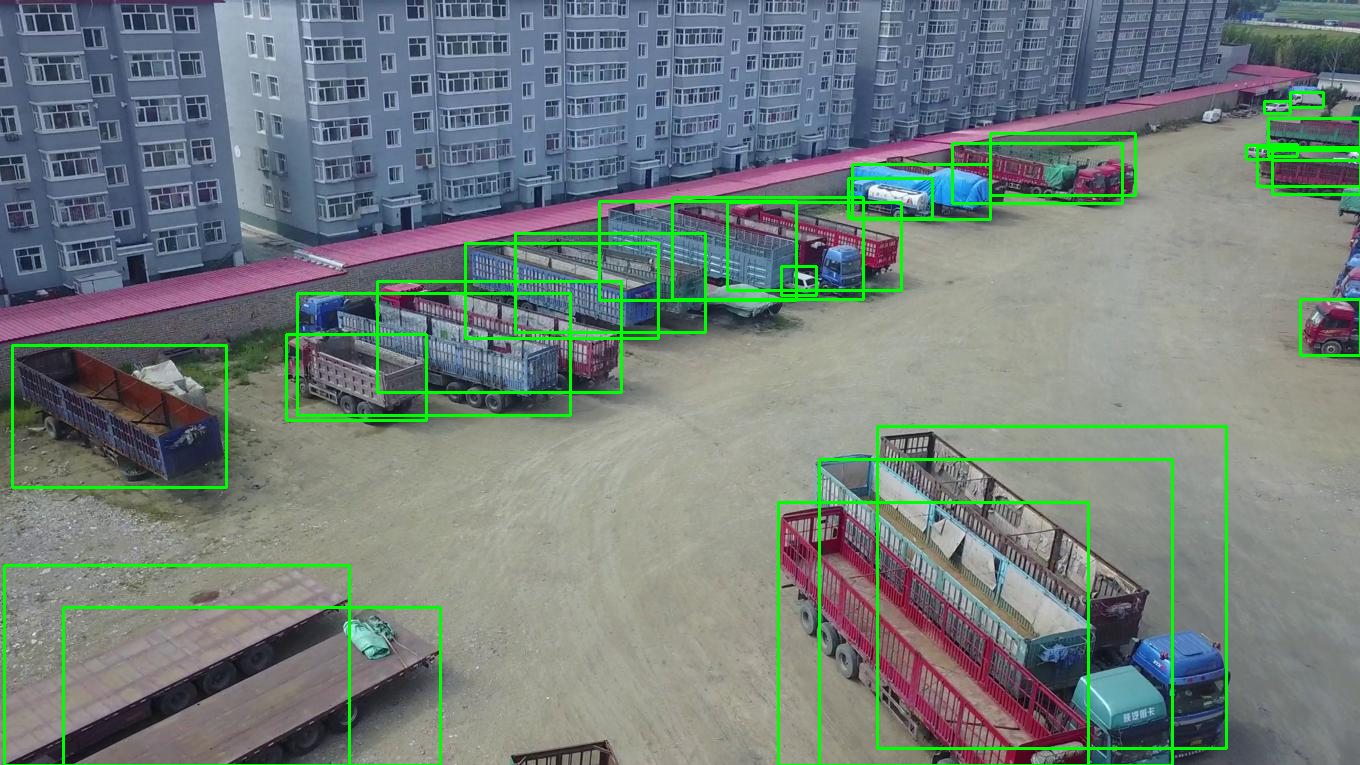

In [ ]:
from google.colab.patches import cv2_imshow

for obj in objects:
    x1, y1, x2, y2 = obj
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
# Show the image with the detected objects
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()